# ADN_T001. Reading and handling molecules

Authors:

* Adnane Aouidate, 2022, Structural Bioinformatics and Chemoinformatics, Institute of Organic and Analytical Chemistry (ICOA), Orléans, France.
* Update , 2023, Ait Melloul Faculty of Applied Sciences, Ibn Zohr University, Agadir, Morocco.

## Aim of this talktorial

In the current tutorial we will learn how to use python combined with Rdkit in order to perform simple things like reading and saving different type of molecule formats and drawing moleucles in a jupyter notebook.
Let's get statrted 

We can read and write molecules on Jupyter Notbook using Rdkit, which is a Open source toolkit for cheminformatics : 
https://www.rdkit.org/

Install rdkit : 

$ conda install -c rdkit rdkit

Then enjoy

### RDKit supports various formats: Mol, Mol2, SDF, SMILES, PDB, FASTA, etc.

# Import the libraries

In [1]:
from rdkit import Chem
import pandas as pd
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw, PandasTools, AllChem, DataStructs
import os
IPythonConsole.ipython_useSVG=True


## Reading molecules

In the case of successful reading the functions return mol object, otherwise None. The latter can be used to check whether reading was successful or not.

## SMILES Example

Coordinates for 2D depiction are generated automatically.


In [2]:
m = Chem.MolFromSmiles("c1ccccc1NC")

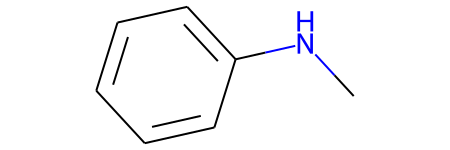

In [3]:
m

Reading of a structure with errors in the structure leads to RDKIT error, and of the molecule will be None.

In [4]:
m = Chem.MolFromSmiles("c1ccccc1O(N)C")

[16:45:50] Explicit valence for atom # 6 O, 3, is greater than permitted


In [5]:
#Here we check if the molecule is None or not
m is None

True

# We can draw molecules with a special property 
### Here some examples : 
#### Gasteiger Charge

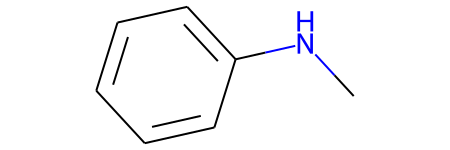

In [6]:
m = Chem.MolFromSmiles("c1ccccc1NC")
AllChem.ComputeGasteigerCharges(m)
m

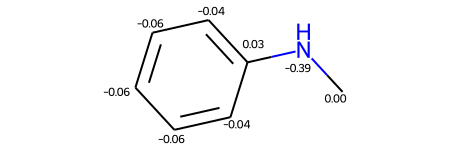

In [7]:
m2 = Chem.Mol(m) 
for at in m2.GetAtoms(): #We get all the atoms from the molecule
    label = '%.2f'%(at.GetDoubleProp("_GasteigerCharge")) #Get the property with 2x precision
    at.SetProp('atomNote',label) #Set the new property to every atom
m2

#### Hide Implicit Hydrogens

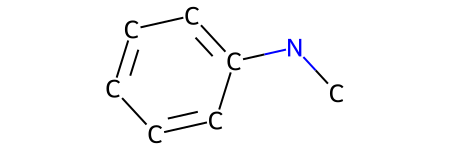

In [8]:
for atom in m.GetAtoms():
    atom.SetProp("atomLabel", atom.GetSymbol())
m

#### With Abbreviations

In [9]:
from rdkit.Chem import rdAbbreviations

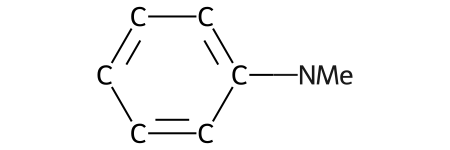

In [10]:
abbrevs = rdAbbreviations.GetDefaultAbbreviations()
nm = rdAbbreviations.CondenseMolAbbreviations(m,abbrevs)
nm

## Writing molecules 

## SMILES Example

By default saving to SMILES provides canonical SMILES but without chirality

In [11]:
m = Chem.MolFromSmiles("[C@H](F)(Cl)C")

Chem.MolToSmiles(m)

'C[C@@H](F)Cl'

# Reading SDF

We can read sdf molecules using SDMolSupplier

In [12]:
mols = Chem.SDMolSupplier('./data-test.sdf')  

In [13]:
len(mols)

50

We can check weither a moleucles if some molecules failed to read (there will be some Nones)

In [14]:
mols = [m for m in mols if m is not None]
len(mols)

50

We can read a special molecule directly from mols

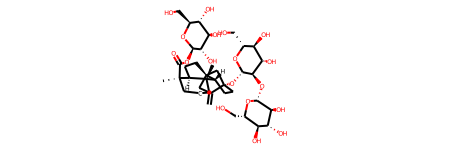

In [15]:
m = mols[10]
m

## Reading sets of molecules

### Major types of molecular file formats:

    .For csv or tsv file that includes a column of SMILES. We can use PandasTools.
    .For smi/.txt file that includes SMILES. 
        Collect the SMILES as a list. The following code is an example to read a .smi file that contains one SMILES per line.
        Otherwise, use import csv and use it as I will show you in the following tutorial.
        

In [16]:
os.chdir("/Users/adnane/Desktop/Github/QSAR_Adnane_Adib/")

In [17]:
!obabel -imol2 comp1_multi22-aligned.mol2 -osmi -O comp1_multi22-aligned.smi

22 molecules converted


### **First method**

In [18]:
file = "/Users/adnane/Desktop/Github/QSAR_Adnane_Adib/comp1_multi22-aligned.smi"
with open(file, 'r') as lines:
    smiles = []
    for line in lines :
        smiles.append(line.split('\t')[0])
    print('The number of SMILES is :', len(smiles))  

The number of SMILES is : 22


### **Second method**

In [19]:
import csv

In [20]:
with open(file, 'r') as lines:
    smiles = []
    #next(lines)
    for line in csv.reader(lines, delimiter = '\t'):
        smiles.append(line[0:5])
    print('The number of SMILES is :', len(smiles)) 

The number of SMILES is : 22


In [21]:
df = pd.DataFrame (smiles, columns = ['smiles', "names"])

In [22]:
df

,smiles,names
0,c1cccc2c1C(=CN2)CCNC(=O)c1ccccc1O,comp1
1,c1c(ccc2c1C(=CN2)CCNC(=O)c1ccc(cc1O)C)Cl,comp21
2,c1cccc2c1C(=CN2)CCNC(=O)c1cc(ccc1O)C,comp11
3,c1cccc2c1C(=CN2)CCNC(=O)c1cc(ccc1O)Cl,comp12
4,c1cccc2c1C(=CN2)CCNC(=O)c1cc(ccc1O)Br,comp13
5,c1cccc2c1C(=CN2)CCNC(=O)c1c(cccc1O)OC,comp14
6,c1cccc2c1C(=CN2)CCNC(=O)c1c(cccc1O)C,comp15
7,c1cccc2c1C(=CN2)CCNC(=O)c1c(cccc1O)F,comp16
8,c1c(ccc2c1C(=CN2)CCNC(=O)c1ccccc1O)OC,comp17
9,c1c(ccc2c1C(=CN2)CCNC(=O)c1ccccc1O)C,comp18


# Add 3D structures to the a Dataframe

In [23]:
df.head()

,smiles,names
0,c1cccc2c1C(=CN2)CCNC(=O)c1ccccc1O,comp1
1,c1c(ccc2c1C(=CN2)CCNC(=O)c1ccc(cc1O)C)Cl,comp21
2,c1cccc2c1C(=CN2)CCNC(=O)c1cc(ccc1O)C,comp11
3,c1cccc2c1C(=CN2)CCNC(=O)c1cc(ccc1O)Cl,comp12
4,c1cccc2c1C(=CN2)CCNC(=O)c1cc(ccc1O)Br,comp13


In [24]:
df['Molecule'] = df['smiles'].apply(Chem.MolFromSmiles) #Get molecule from smiles
df['Molecule'] = df['Molecule'].apply(Chem.AddHs)  # Add hydrogens to the molecules
df['Conformer'] = df['Molecule'].apply(AllChem.EmbedMolecule)  # Generate conformers
df['Energy'] = df['Molecule'].apply(AllChem.MMFFOptimizeMolecule)  # Optimize conformers using MMFF94 force field
# Enable image rendering in DataFrames
PandasTools.RenderImagesInAllDataFrames() 

,smiles,names,Molecule,Conformer,Energy
0,c1cccc2c1C(=CN2)CCNC(=O)c1ccccc1O,comp1,,0,1

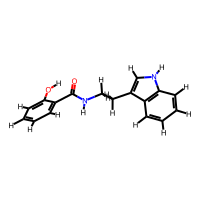

In [25]:
df.head(1)

In [26]:
df["n_Atoms"] = df['Molecule'].map(lambda x: x.GetNumAtoms())

,smiles,names,Molecule,Conformer,Energy,n_Atoms
0,c1cccc2c1C(=CN2)CCNC(=O)c1ccccc1O,comp1,,0,1,37

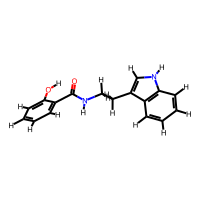

In [27]:
df.head(1)